<a href="https://colab.research.google.com/github/Startama/Clara-AMV-Project/blob/main/Clara_AMV_Project_Python_file.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   Age  Weight (kg)  T-Stage  N-Stage  M-Stage  Smoking History
0   59         79.0        3        2      0.0                1
1   71         75.0        1        0      0.0                1
2   67         79.0        3        0      0.0                1
3   90         50.0        4        1      0.0                1
4   58         63.4        5        1      1.0                0
5   58         64.5        5        0      0.0                0
6   61         88.0        1        1      0.0                1
7   50         66.0        2        1      0.0                0
8   57         68.0        4        0      0.0                1
9   57         55.0        6        0      0.0                1


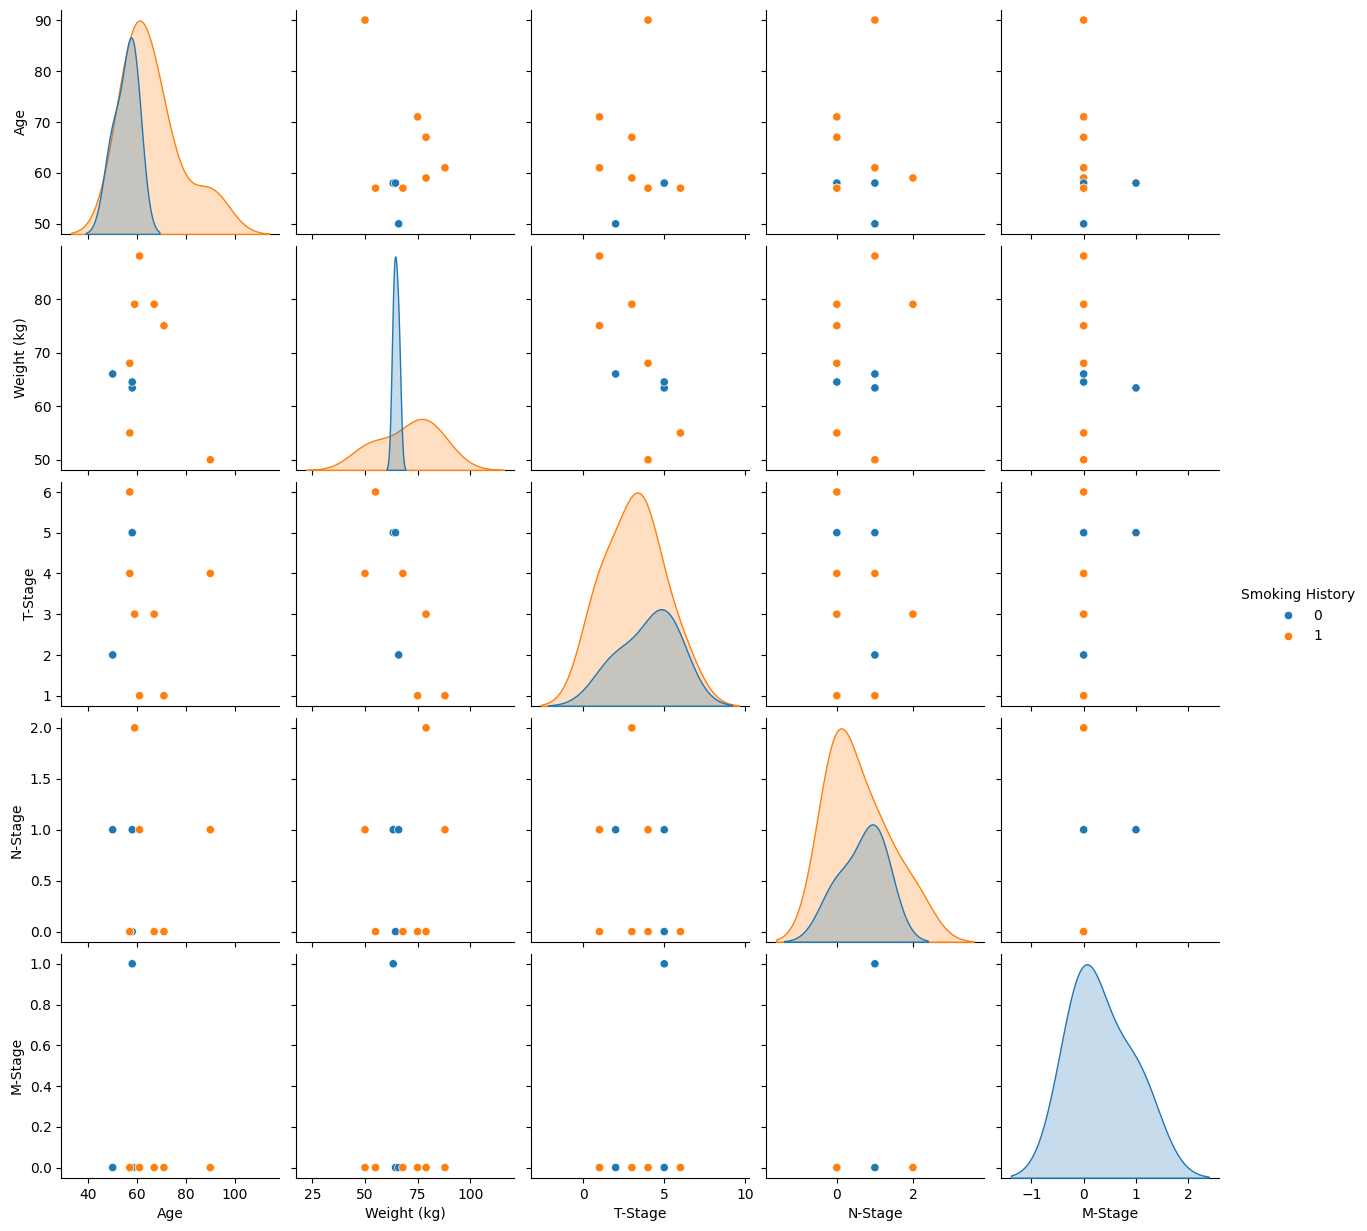

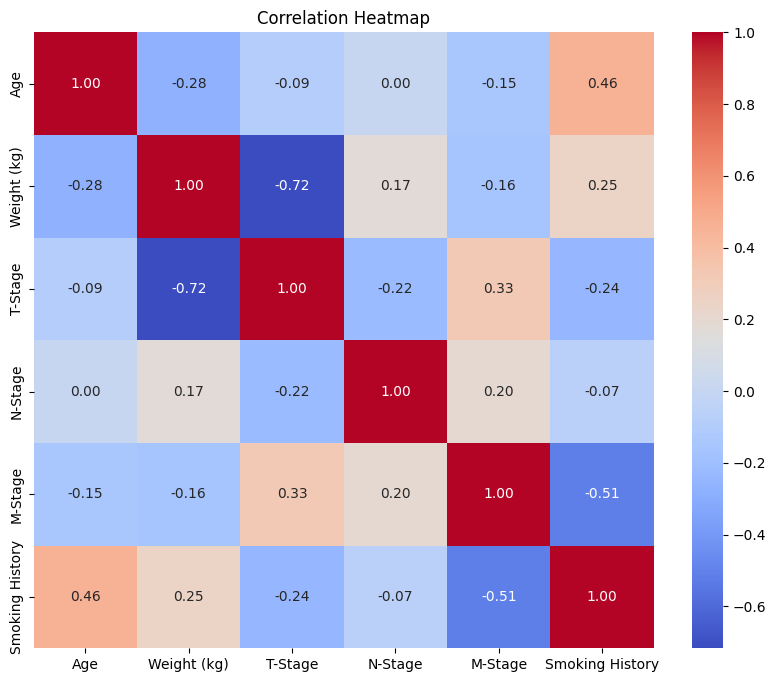

                      Age  Weight (kg)   T-Stage   N-Stage   M-Stage  \
Age              1.000000    -0.277708 -0.088412  0.002850 -0.151213   
Weight (kg)     -0.277708     1.000000 -0.716654  0.173137 -0.162986   
T-Stage         -0.088412    -0.716654  1.000000 -0.222681  0.328244   
N-Stage          0.002850     0.173137 -0.222681  1.000000  0.201008   
M-Stage         -0.151213    -0.162986  0.328244  0.201008  1.000000   
Smoking History  0.461963     0.246853 -0.241747 -0.065795 -0.509175   

                 Smoking History  
Age                     0.461963  
Weight (kg)             0.246853  
T-Stage                -0.241747  
N-Stage                -0.065795  
M-Stage                -0.509175  
Smoking History         1.000000  


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create the dataset
data = {
    'NewPatientID': ['G0034', 'G0035', 'G0036', 'G0037', 'G0038', 'G0039', 'G0042', 'G0044', 'G0046', 'G0058'],
    'Sex': ['M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M'],
    'Age': [59, 71, 67, 90, 58, 58, 61, 50, 57, 57],
    'Weight (kg)': [79, 75, 79, 50, 63.4, 64.5, 88, 66, 68, 55],
    'T-Stage': ['2a', '1b', '2a', '2b', '3', '3', '1b', '1c', '2b', '4'],
    'N-Stage': [2, 0, 0, 1, 1, 0, 1, 1, 0, 0],
    'M-Stage': [0, 0, 0, 0, 1, 0, 0, None, 0, 0],
    'Histopathological Grading': [None, None, None, None, None, 'G2', None, None, None, None],
    'Smoking History': [1, 1, 1, 1, 0, 0, 1, 0, 1, 1]
}

# Convert the data to a DataFrame
df = pd.DataFrame(data)

# Convert categorical T-Stage to numeric values for correlation analysis
t_stage_mapping = {'1b': 1, '1c': 2, '2a': 3, '2b': 4, '3': 5, '4': 6}
df['T-Stage'] = df['T-Stage'].map(t_stage_mapping)

# Convert 'M-Stage' column to numeric, replace None with 0 or a default value if necessary
df['M-Stage'] = pd.to_numeric(df['M-Stage'], errors='coerce').fillna(0)

# Replace 'None' in Histopathological Grading with 'Unknown'
df['Histopathological Grading'] = df['Histopathological Grading'].fillna('Unknown')

# Remove non-numeric columns for correlation analysis (NewPatientID, Sex, and Histopathological Grading)
df_numeric = df.drop(columns=['NewPatientID', 'Sex', 'Histopathological Grading'])

# Display the dataframe to verify
print(df_numeric)

# Plot pairplot for all numerical values in the dataset
sns.pairplot(df_numeric, hue='Smoking History', diag_kind='kde')
plt.show()

# Calculate the correlation matrix for numeric data
correlation_matrix = df_numeric.corr()

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Analysis based on the correlation matrix
print(correlation_matrix)